<h1>PROJECT SKELETON (GPT + Placeholder)</h1>
Dataset: https://archive.ics.uci.edu/dataset/92/challenger+usa+space+shuttle+o+ring <br>
Names:  John Doe, Joe Doe, Jason Doe <br>
Date: 29/9/2024

In [ ]:
#Optional pip install (if not installed already) for CLI
pip install pandas numpy scipy matplotlib seaborn statsmodels ucimlrepo

In [4]:
#Library Import
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

<b>Project Descriptive Information</b>
<p>Lorem ipsum odor amet, consectetuer adipiscing elit. Quis tincidunt vel iaculis ligula proin. Feugiat faucibus vel sapien dis dolor montes praesent. Sagittis torquent ante habitant viverra id. Non duis parturient arcu sed sit phasellus. Amet sapien maximus platea sit mattis sodales proin. Pretium scelerisque proin curae leo at consequat. Morbi interdum orci aptent; senectus dis euismod sodales. Fringilla ad tortor rhoncus sapien, gravida vulputate.</p>

In [5]:
# Fetch the dataset
challenger_usa_space_shuttle_o_ring = fetch_ucirepo(id=92)

# Data (as pandas DataFrames)
X = challenger_usa_space_shuttle_o_ring.data.features
y = challenger_usa_space_shuttle_o_ring.data.targets

# Combine features and targets into a single DataFrame for analysis
data = pd.concat([X, y], axis=1)

# 1. Initial Descriptive Summary Statistics
summary_stats = data.describe()
print("Descriptive Summary Statistics:\n", summary_stats)

Descriptive Summary Statistics:
        num_thermal_distress  launch_temp  leak_check_pressure  temporal_order  \
count             23.000000    23.000000            23.000000        23.00000   
mean               0.391304    69.565217           152.173913        12.00000   
std                0.656376     7.057080            68.221332         6.78233   
min                0.000000    53.000000            50.000000         1.00000   
25%                0.000000    67.000000            75.000000         6.50000   
50%                0.000000    70.000000           200.000000        12.00000   
75%                1.000000    75.000000           200.000000        17.50000   
max                2.000000    81.000000           200.000000        23.00000   

       num_O_rings  
count         23.0  
mean           6.0  
std            0.0  
min            6.0  
25%            6.0  
50%            6.0  
75%            6.0  
max            6.0  


<b>Descriptive Summary Statistics Interpretation</b>
<p>Lorem ipsum odor amet, consectetuer adipiscing elit. Quis tincidunt vel iaculis ligula proin. Feugiat faucibus vel sapien dis dolor montes praesent. Sagittis torquent ante habitant viverra id. Non duis parturient arcu sed sit phasellus. Amet sapien maximus platea sit mattis sodales proin. Pretium scelerisque proin curae leo at consequat. Morbi interdum orci aptent; senectus dis euismod sodales. Fringilla ad tortor rhoncus sapien, gravida vulputate.</p>

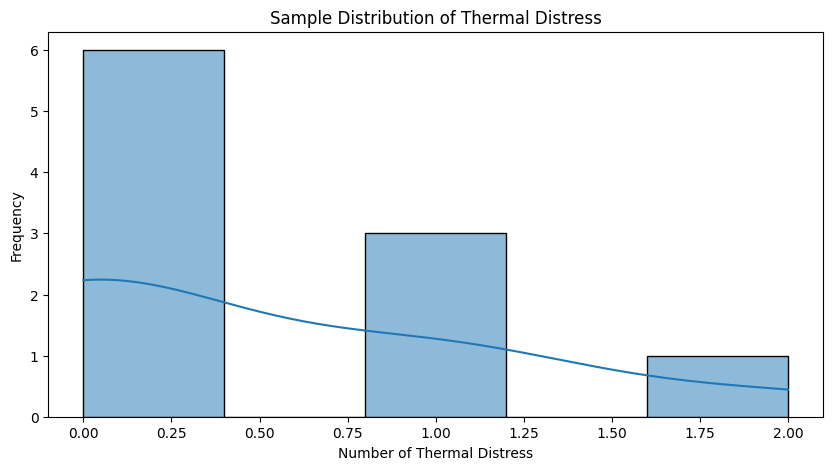

In [6]:
#Sample and Sampling Distributions
# 2. Sample and Sampling Distributions
# Take a sample of the dataset
sample_size = 10
sample = data.sample(sample_size, random_state=42)

# Plotting the distribution of the sample
plt.figure(figsize=(10, 5))
sns.histplot(sample['num_thermal_distress'], bins=5, kde=True)
plt.title('Sample Distribution of Thermal Distress')
plt.xlabel('Number of Thermal Distress')
plt.ylabel('Frequency')
plt.show()

<b>Sample and Sampling Distributions Interpretation</b>
<p>Lorem ipsum odor amet, consectetuer adipiscing elit. Quis tincidunt vel iaculis ligula proin. Feugiat faucibus vel sapien dis dolor montes praesent. Sagittis torquent ante habitant viverra id. Non duis parturient arcu sed sit phasellus. Amet sapien maximus platea sit mattis sodales proin. Pretium scelerisque proin curae leo at consequat. Morbi interdum orci aptent; senectus dis euismod sodales. Fringilla ad tortor rhoncus sapien, gravida vulputate.</p>

In [7]:
#Point Estimates and Confidence Intervals
# 3. Point Estimates and Confidence Intervals
# Mean and Standard Deviation of num_thermal_distress
mean_distress = sample['num_thermal_distress'].mean()
std_distress = sample['num_thermal_distress'].std()

# 95% Confidence Interval
confidence_level = 0.95
degrees_freedom = sample_size - 1
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, mean_distress, std_distress/np.sqrt(sample_size))

print(f"Point Estimate (Mean): {mean_distress}")
print(f"95% Confidence Interval: {confidence_interval}")

Point Estimate (Mean): 0.5
95% Confidence Interval: (-0.005833719192982811, 1.005833719192983)


<b>Point Estimates and Confidence Intervals Interpretation</b>
<p>Lorem ipsum odor amet, consectetuer adipiscing elit. Quis tincidunt vel iaculis ligula proin. Feugiat faucibus vel sapien dis dolor montes praesent. Sagittis torquent ante habitant viverra id. Non duis parturient arcu sed sit phasellus. Amet sapien maximus platea sit mattis sodales proin. Pretium scelerisque proin curae leo at consequat. Morbi interdum orci aptent; senectus dis euismod sodales. Fringilla ad tortor rhoncus sapien, gravida vulputate.</p>

                             OLS Regression Results                             
Dep. Variable:     num_thermal_distress   R-squared:                       0.360
Model:                              OLS   Adj. R-squared:                  0.259
Method:                   Least Squares   F-statistic:                     3.563
Date:                  Sun, 29 Sep 2024   Prob (F-statistic):             0.0337
Time:                          16:09:10   Log-Likelihood:                -17.308
No. Observations:                    23   AIC:                             42.62
Df Residuals:                        19   BIC:                             47.16
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

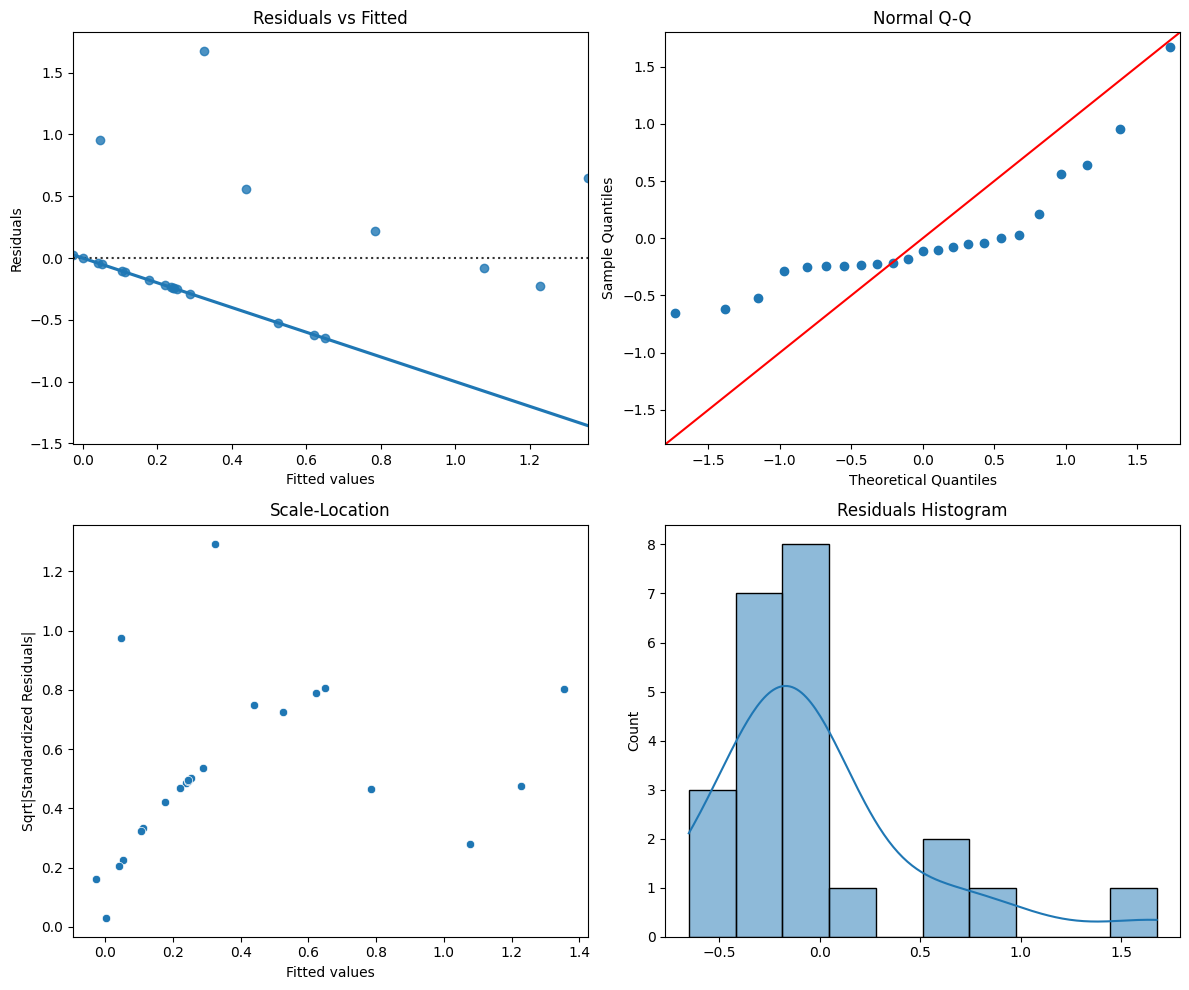

In [8]:
#Regression Model (Multivariate correlation Analysis?) 
# 4. Regression Model (Multivariate Correlation Analysis)
# Define independent variables (features) and the dependent variable (target)
X = data[['launch_temp', 'leak_check_pressure', 'temporal_order']]
y = data['num_thermal_distress']

# Adding a constant for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print out the model summary
print(model.summary())

# Plotting the regression diagnostics
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Residuals vs Fitted
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, ax=ax[0, 0])
ax[0, 0].set_title('Residuals vs Fitted')
ax[0, 0].set_xlabel('Fitted values')
ax[0, 0].set_ylabel('Residuals')

# Q-Q plot
sm.qqplot(model.resid, line='45', ax=ax[0, 1])
ax[0, 1].set_title('Normal Q-Q')

# Scale-Location
sns.scatterplot(x=model.fittedvalues, y=np.sqrt(np.abs(model.resid)), ax=ax[1, 0])
ax[1, 0].set_title('Scale-Location')
ax[1, 0].set_xlabel('Fitted values')
ax[1, 0].set_ylabel('Sqrt|Standardized Residuals|')

# Residuals Histogram
sns.histplot(model.resid, bins=10, kde=True, ax=ax[1, 1])
ax[1, 1].set_title('Residuals Histogram')

plt.tight_layout()
plt.show()

<b>Regression Model (Multivariate correlation Analysis?) Interpretation</b>
<p>Lorem ipsum odor amet, consectetuer adipiscing elit. Quis tincidunt vel iaculis ligula proin. Feugiat faucibus vel sapien dis dolor montes praesent. Sagittis torquent ante habitant viverra id. Non duis parturient arcu sed sit phasellus. Amet sapien maximus platea sit mattis sodales proin. Pretium scelerisque proin curae leo at consequat. Morbi interdum orci aptent; senectus dis euismod sodales. Fringilla ad tortor rhoncus sapien, gravida vulputate.</p>